#                                         NPV_MINI_PROJECT

In [1]:
import pandas as pd
import numpy as np

emp_health_df=pd.read_csv('emp_health.csv')

emp_health_df.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [2]:
emp_health_df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [3]:
emp_health_df.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [4]:

emp_health_above_50_data=emp_health_df[(emp_health_df['age']>50) & (emp_health_df['smoke']=='yes')]

print(emp_health_above_50_data.reset_index())

print('#############################')

print("no of employees above 50 age and do smoking:---->",emp_health_above_50_data.shape[0])

    index      id  age     sex     bmi  dependent  alcohol smoke       zone  \
0      11  i10023   62  female  26.290          0    daily   yes      south   
1      39  i10051   60    male  39.900          0    daily   yes  southwest   
2      55  i10067   58    male  36.955          2  weekend   yes  northwest   
3      58  i10070   53  female  22.880          1    daily   yes      south   
4      86  i10098   57  female  31.160          0       no   yes  northwest   
..    ...     ...  ...     ...     ...        ...      ...   ...        ...   
59   1265  i11277   64    male  23.760          0  weekend   yes  southeast   
60   1284  i11296   61    male  36.300          1    daily   yes  southwest   
61   1301  i11313   62    male  30.875          3       no   yes       west   
62   1321  i11333   62    male  26.695          0    daily   yes       east   
63   1337  i11349   61  female  29.070          0       no   yes       west   

    expenditure  
0   27808.72510  
1   48173.36100

In [5]:
print("average expenditure on health management of employess above age 50 and do smoking:-------------->")
      
emp_health_above_50_data['expenditure'].mean()

average expenditure on health management of employess above age 50 and do smoking:-------------->


38820.22308234376

# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [6]:
female_employees_no_alocohol_daily=emp_health_df[(emp_health_df['sex']=='female') & (emp_health_df['alcohol']!="daily") & 
                                                (emp_health_df['alcohol']!="no")]


female_employees_no_alocohol_daily

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
13,i10025,56,female,39.820,0,weekend,no,south,11090.71780
16,i10028,52,female,30.780,1,party,no,north,10797.33620
20,i10032,60,female,36.005,0,weekend,no,north,13228.84695
21,i10033,30,female,32.400,1,rarely,no,southwest,4149.73600
...,...,...,...,...,...,...,...,...,...
1323,i11335,42,female,40.370,2,rarely,yes,southeast,43896.37630
1328,i11340,23,female,24.225,2,weekend,no,east,22395.74424
1332,i11344,52,female,44.700,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350


In [7]:
print(" no of female employees did not consume alcohol daily : -->",female_employees_no_alocohol_daily.shape[0])

 no of female employees did not consume alcohol daily : --> 341


In [8]:
total_female_employees=emp_health_df[emp_health_df['sex']=='female'].shape[0]

total_female_employees_no_alocohol_daily=female_employees_no_alocohol_daily.shape[0]

In [9]:
print("proportion of female employees who donot consume alcohol daily with respect to total female employees is :------>")
proportion=total_female_employees_no_alocohol_daily/total_female_employees
print(proportion)

proportion of female employees who donot consume alcohol daily with respect to total female employees is :------>
0.5151057401812689


# 3. Display zone wise average expenditure of employees on health

In [10]:
average_expenditure_zonewise=emp_health_df.groupby(['zone'])['expenditure'].mean()
average_expenditure_zonewise=average_expenditure_zonewise.reset_index()
average_expenditure_zonewise.columns=['zone','average_expenditure_of_emp_on_health']
average_expenditure_zonewise

,zone,average_expenditure_of_emp_on_health
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


# 4. Employees of which zone did maximum expenditure on health

In [11]:
print(" Employees of which zone did maximum expenditure on health :--------------------->")
max_expenditure=average_expenditure_zonewise['average_expenditure_of_emp_on_health'].max()
max_expenditure_zone_df=average_expenditure_zonewise[average_expenditure_zonewise['average_expenditure_of_emp_on_health']==
                                                     max_expenditure]

max_expenditure_zone_df

 Employees of which zone did maximum expenditure on health :--------------------->


,zone,average_expenditure_of_emp_on_health
4,south,14715.689519


In [12]:
print(f''' employesss of :----->>>{max_expenditure_zone_df.loc[4,'zone']} 
zone  did maximum expenditure on health ie. of>>>>>>>>>
{max_expenditure_zone_df.loc[4,'average_expenditure_of_emp_on_health']} rupees''')

 employesss of :----->>>south 
zone  did maximum expenditure on health ie. of>>>>>>>>>
14715.689519285717 rupees


# 5. What is the minimum expenditure done by any employee in organization

In [13]:
minimum_expenditure_by_any_employee=emp_health_df[emp_health_df['expenditure']==emp_health_df['expenditure'].min()] 

In [14]:
minimum_expenditure_by_any_employee

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


In [15]:
print("What is the minimum expenditure done by any employee in organization--------->>>")

minimum_expenditure_by_any_employee['expenditure'][940]

What is the minimum expenditure done by any employee in organization--------->>>


1121.8739

# 6. What is average expenditure of employees who have 2 or lesser dependents

In [16]:
set(emp_health_df['dependent'].to_list())

{0, 1, 2, 3, 4, 5}

In [17]:
emp_with_two_or_less_dependents=emp_health_df[emp_health_df['dependent']<=2]
emp_with_two_or_less_dependents

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
...,...,...,...,...,...,...,...,...,...
1331,i11343,23,female,33.400,0,daily,no,southwest,10795.93733
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [18]:
set(emp_with_two_or_less_dependents['dependent'].to_list())

{0, 1, 2}

In [19]:
emp_with_two_or_less_dependents['expenditure'].mean()

13040.970970948154

In [20]:
print("average expenditure of employees who have 2 or lesser dependents :>>>>>",emp_with_two_or_less_dependents['expenditure'].mean())

average expenditure of employees who have 2 or lesser dependents :>>>>> 13040.970970948154


# 7. How many employees are below age of 20 years. What is their average BMI

In [21]:
emp_age_below_twenty_years=emp_health_df[emp_health_df['age']<20]
emp_age_below_twenty_years

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
22,i10034,18,male,34.100,0,daily,no,south,1137.01100
31,i10043,18,female,26.315,0,daily,no,north,2198.18985
...,...,...,...,...,...,...,...,...,...
1315,i11327,18,male,28.310,1,weekend,no,east,11272.33139
1316,i11328,19,female,20.600,0,weekend,no,southwest,1731.67700
1317,i11329,18,male,53.130,0,party,no,southeast,1163.46270
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080


In [22]:
print("count of employees who are below age of 20 years :>>>",emp_age_below_twenty_years.shape[0])

count of employees who are below age of 20 years :>>> 137


In [23]:
average_bmi_of_emp_age_below_twenty_years=emp_age_below_twenty_years['bmi'].mean()
average_bmi_of_emp_age_below_twenty_years

29.97149635036496

# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [24]:
non_smoker=emp_health_df[(emp_health_df['sex']=='male') & (emp_health_df['smoke']=="no")]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [25]:
non_alcoholic=emp_health_df[(emp_health_df['sex']=="male") & (emp_health_df['alcohol']=="no")]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [26]:
non_smoker_non_alcoholic=non_smoker[non_smoker['alcohol']=='no']
non_alcoholic_non__smoker=non_alcoholic[non_alcoholic['smoke']=='no']
non_smoking_alcoholic=pd.concat([non_smoker_non_alcoholic,non_alcoholic_non__smoker])
non_smoking_alcoholic=non_smoking_alcoholic[['id','smoke','alcohol']]
non_smoking_alcoholic

,id,smoke,alcohol
18,i10030,no,no
24,i10036,no,no
28,i10040,no,no
37,i10049,no,no
67,i10079,no,no
...,...,...,...
1261,i11273,no,no
1270,i11282,no,no
1310,i11322,no,no
1320,i11332,no,no


# 11.What is the count for each zone with respect to number of dependent

In [27]:
count_of_each_zone_wrt_no_of_dependent=emp_health_df.groupby(['zone','dependent']).size()
count_of_each_zone_wrt_no_of_dependent=count_of_each_zone_wrt_no_of_dependent.reset_index()
count_of_each_zone_wrt_no_of_dependent.columns=['zone','dependent','count']
count_of_each_zone_wrt_no_of_dependent.pivot_table(index='dependent',columns='zone',values='count')

zone,east,north,northeast,northwest,south,southeast,southwest,west
dependent,,,,,,,,
0,124.0,26.0,35.0,70.0,38.0,81.0,116.0,84.0
1,65.0,20.0,9.0,28.0,21.0,57.0,53.0,71.0
2,42.0,10.0,15.0,30.0,12.0,38.0,44.0,49.0
3,22.0,12.0,13.0,13.0,12.0,15.0,25.0,45.0
4,6.0,1.0,2.0,4.0,1.0,2.0,6.0,3.0
5,3.0,1.0,NaN,NaN,NaN,5.0,7.0,2.0


# 12. Classify the employees into 3 categories.
 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.


In [28]:
def get_bmi_category(bmi):
    try:
        if(bmi<18.5):
            return "underweight"
        if(18.5<=bmi<=24.9):
            return "fit"
        if(bmi>24.9):
            return "overweight"
    except Exception as e:
        print(e)

In [29]:
emp_health_df['bmi_category']=emp_health_df['bmi'].apply(get_bmi_category)
emp_health_df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,overweight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,overweight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,overweight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,overweight


# What is the average expenditure of employees in each category.

In [30]:
average_expenditure_of_emp_in_each_bmi_category=emp_health_df.groupby(['bmi_category'])['expenditure'].mean()
average_expenditure_of_emp_in_each_bmi_category=average_expenditure_of_emp_in_each_bmi_category.reset_index()
average_expenditure_of_emp_in_each_bmi_category

,bmi_category,expenditure
0,fit,10379.499732
1,overweight,13936.616823
2,underweight,8852.200585


# Display the bar chart for the same

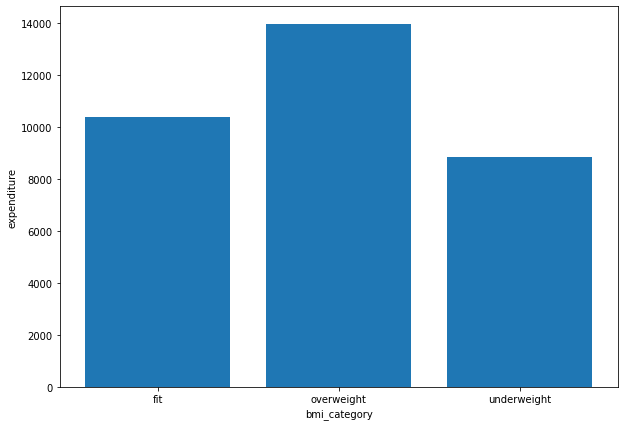

In [31]:

from matplotlib import pyplot as plt
 

 
 
bmi_category = average_expenditure_of_emp_in_each_bmi_category['bmi_category']
expenditure = average_expenditure_of_emp_in_each_bmi_category['expenditure']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(bmi_category,expenditure)
plt.xlabel('bmi_category')
plt.ylabel('expenditure')
# Show Plot
plt.show()

# 13. Draw line plot of expenditure against age and BMI

In [32]:
average_age_expenditure=emp_health_df.groupby(['age'])['expenditure'].mean()
average_age_expenditure=average_age_expenditure.reset_index()
average_age_expenditure

,age,expenditure
0,18,7086.217556
1,19,9747.909335
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


In [33]:
average_bmi_expenditure=emp_health_df.groupby(['bmi'])['expenditure'].mean()
average_bmi_expenditure=average_bmi_expenditure.reset_index()
average_bmi_expenditure

,bmi,expenditure
0,15.960,1694.796400
1,16.815,4904.000350
2,17.195,14455.644050
3,17.290,7813.353433
4,17.385,2775.192150
...,...,...
543,48.070,9432.925300
544,49.060,11381.325400
545,50.380,2438.055200
546,52.580,44501.398200


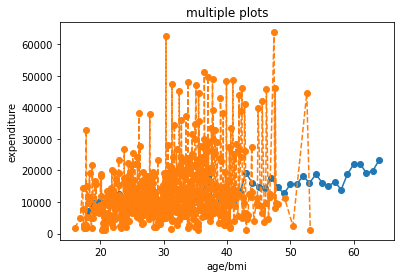

In [34]:
import matplotlib.pyplot as plt
import numpy as np
  
x = average_age_expenditure['age'].to_list()
y = average_age_expenditure['expenditure'].to_list()
  
# first plot with X and Y data
plt.plot(x, y,'o-')
  
x1 = average_bmi_expenditure['bmi'].to_list()
y1=average_bmi_expenditure['expenditure'].to_list()

  
# second plot with x1 and y1 data
plt.plot(x1, y1, '--o')
  
plt.xlabel("age/bmi")
plt.ylabel("expenditure")
plt.title('multiple plots')

plt.show()


# 14. Draw a bar chart to show zone wise average expenditure

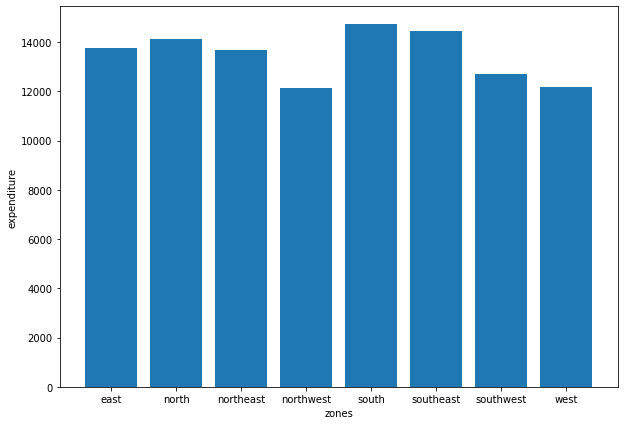

In [35]:
 
zones = average_expenditure_zonewise['zone'].to_list()
expenditure = average_expenditure_zonewise['average_expenditure_of_emp_on_health'].to_list()
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(zones,expenditure)
plt.xlabel('zones')
plt.ylabel('expenditure')
# Show Plot
plt.show()

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [36]:
average_smoking_expenditure=emp_health_df.groupby(['smoke'])['expenditure'].mean()
average_smoking_expenditure=average_smoking_expenditure.reset_index()
average_smoking_expenditure

,smoke,expenditure
0,no,8434.268298
1,yes,32050.231832


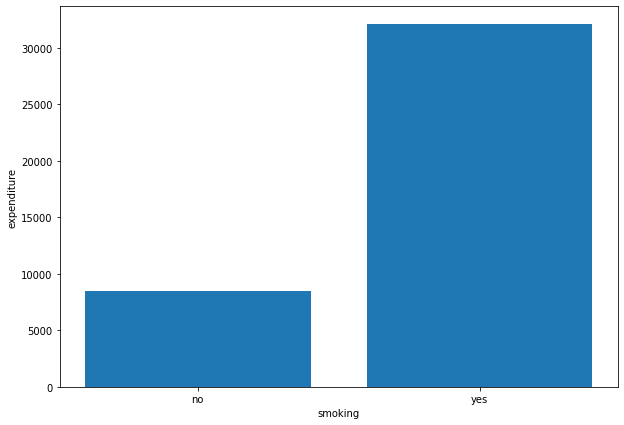

In [37]:
 
smoking = average_smoking_expenditure['smoke'].to_list()
smoking_expenditure = average_smoking_expenditure['expenditure'].to_list()
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(smoking,smoking_expenditure)
plt.xlabel('smoking')
plt.ylabel('expenditure')
# Show Plot
plt.show()

In [38]:
average_alcoholic_expenditure=emp_health_df.groupby(['alcohol'])['expenditure'].mean()
average_alcoholic_expenditure=average_alcoholic_expenditure.reset_index()
average_alcoholic_expenditure

,alcohol,expenditure
0,daily,13001.772968
1,no,14277.090885
2,party,13050.583157
3,rarely,12419.686784
4,weekend,13145.632539


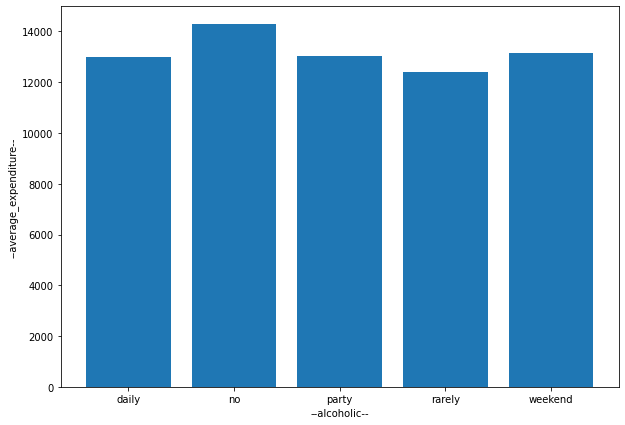

In [39]:
 
alcoholic = average_alcoholic_expenditure['alcohol'].to_list()
alcoholic_expenditure = average_alcoholic_expenditure['expenditure'].to_list()
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(alcoholic,alcoholic_expenditure)
plt.xlabel('--alcoholic--')
plt.ylabel('--average_expenditure--')
# Show Plot
plt.show()

# 16. Draw pie chart for alcohol consumption habits

In [40]:
alcoholic_consumptions_habit=emp_health_df['alcohol'].value_counts()
alcoholic_consumptions_habit=alcoholic_consumptions_habit.reset_index()
alcoholic_consumptions_habit.columns=['alcohol_habits','emp_count']
alcoholic_consumptions_habit

,alcohol_habits,emp_count
0,daily,395
1,weekend,347
2,party,278
3,no,259
4,rarely,59


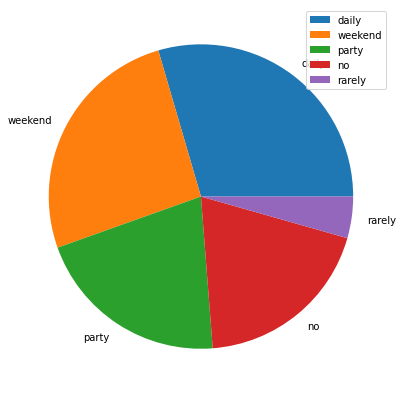

In [41]:
alcohol_habits=alcoholic_consumptions_habit['alcohol_habits'].to_list()
data=alcoholic_consumptions_habit['emp_count'].to_list()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = alcohol_habits)
plt.legend()
  
# show plot
plt.show()

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

<AxesSubplot:xlabel='age', ylabel='expenditure'>

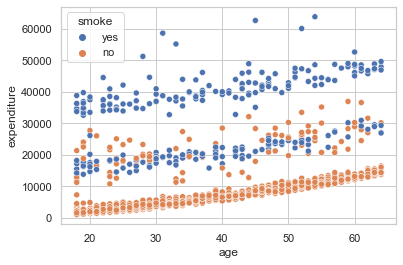

In [42]:
import seaborn as sns
 
 
 
sns.set(style='whitegrid')

 
sns.scatterplot(x="age",
                y="expenditure",
                hue="smoke",
                
                data=emp_health_df)

# 18. Draw distribution plot of expenditure

c:\users\mayur g\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenditure'>

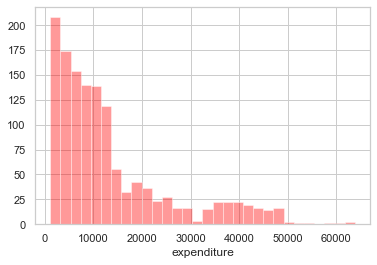

In [43]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(emp_health_df['expenditure'], kde = False, color ='red', bins = 30)

# 19. Display the pairplot

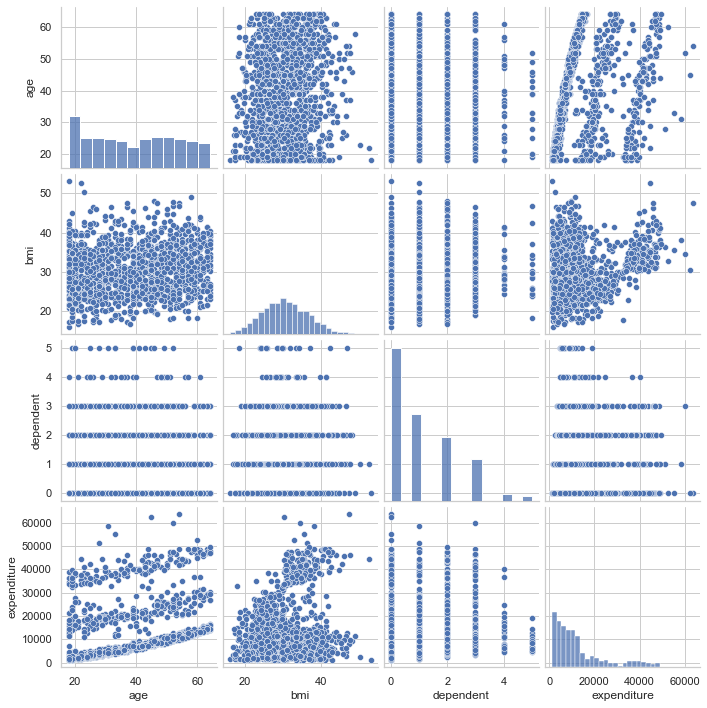

In [44]:
sns.pairplot(emp_health_df)
# to show
plt.show()

# 20. Display heatmap for the data

<AxesSubplot:>

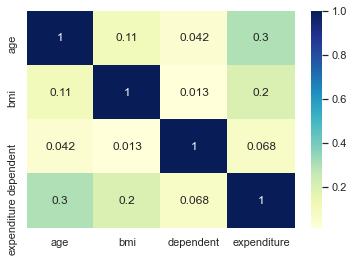

In [45]:

dataplot = sns.heatmap(emp_health_df.corr(), cmap="YlGnBu", annot=True)
dataplot